
# Copy Number Heatmaps

scgenome can be used to plot a heatmap of copy number changes across the genome for a set of cells.  The heatmaps can be annotated based on per cell properties stored in the `obs` dataframe of the `AnnData`.


In [1]:

import scgenome
import matplotlib.pyplot as plt

adata = scgenome.datasets.OV2295_HMMCopy_reduced()



## Basic Heatmaps

The `scgenome.pl.plot_cell_cn_matrix` function can be used to produce a basic heatmap plot of copy number with rows representing cells (or clones) and columns bins of the genome.  Use the `layer_name` arg to specify the layer to plot.  By default the standard copy number palette will be used to map integer copy number values to heatmap colors.


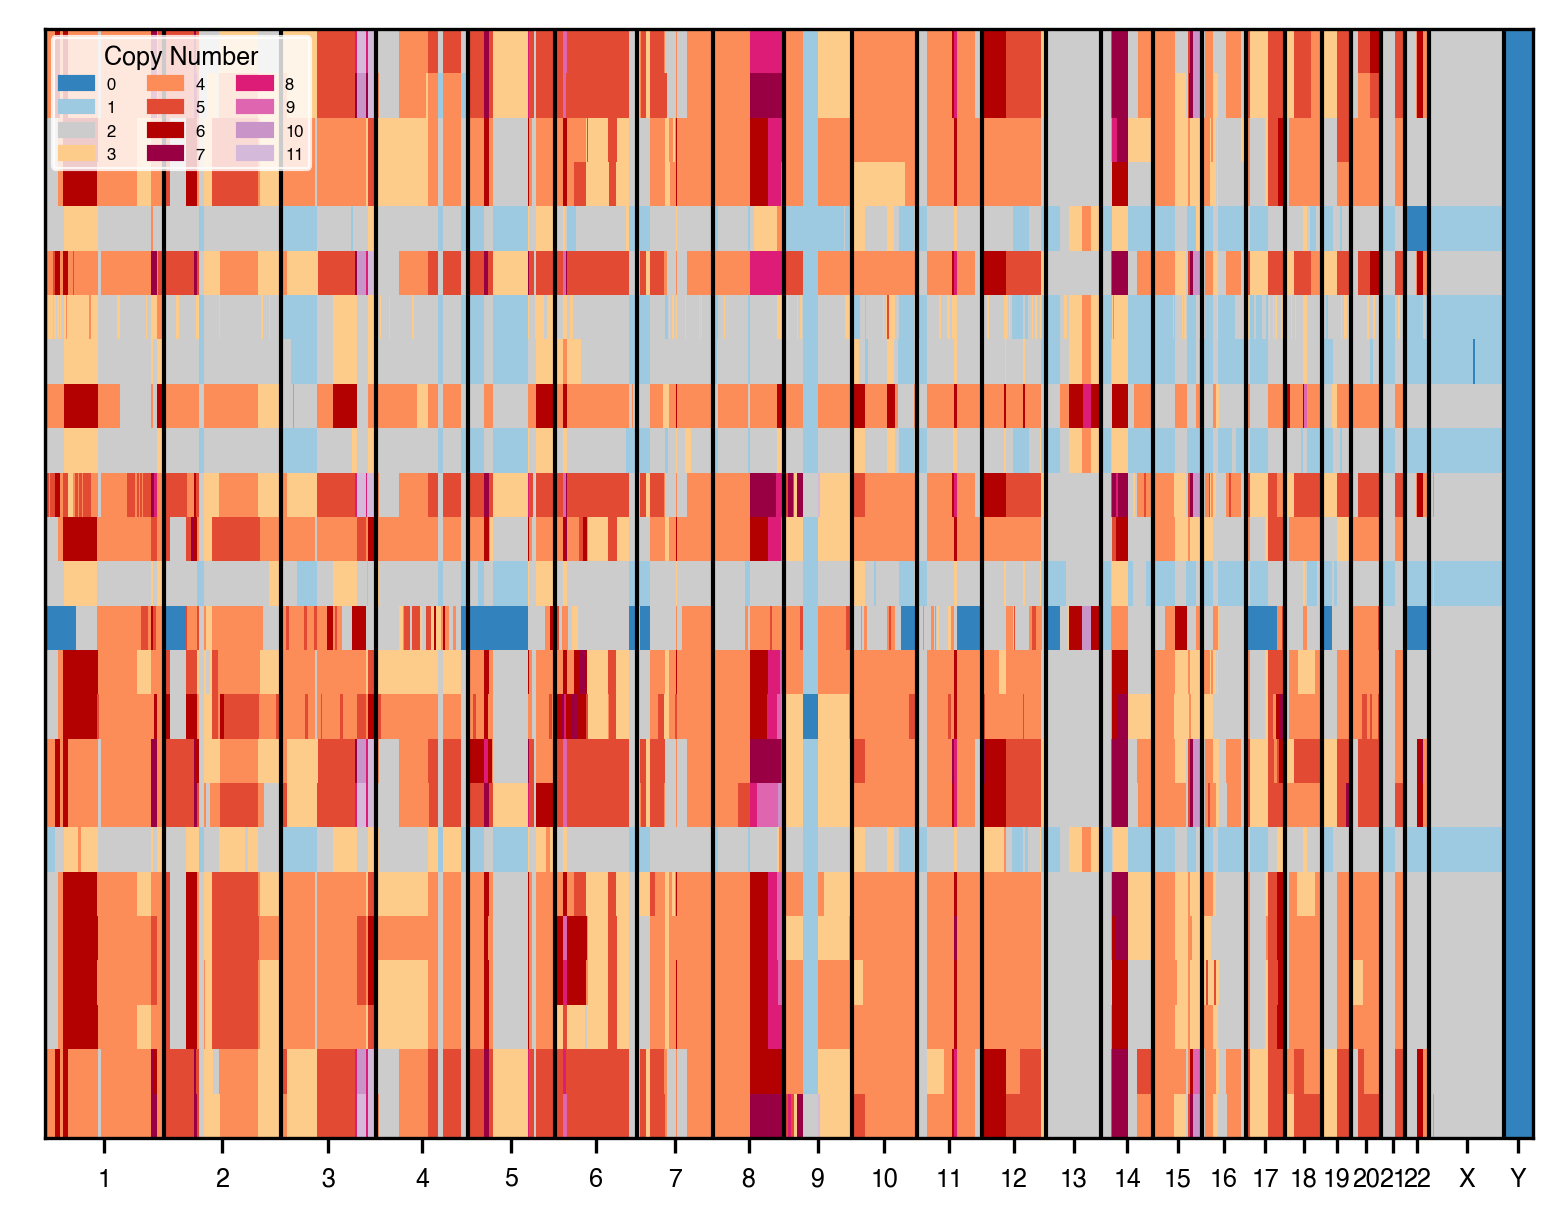

In [8]:

g = scgenome.pl.plot_cell_cn_matrix(adata, layer_name='state')
scgenome.pl.cn_legend(plt.gca())



Plotting raw values is also possible with `raw=True`.  Use `layer_name=None` to do a heatmap of `.X`.


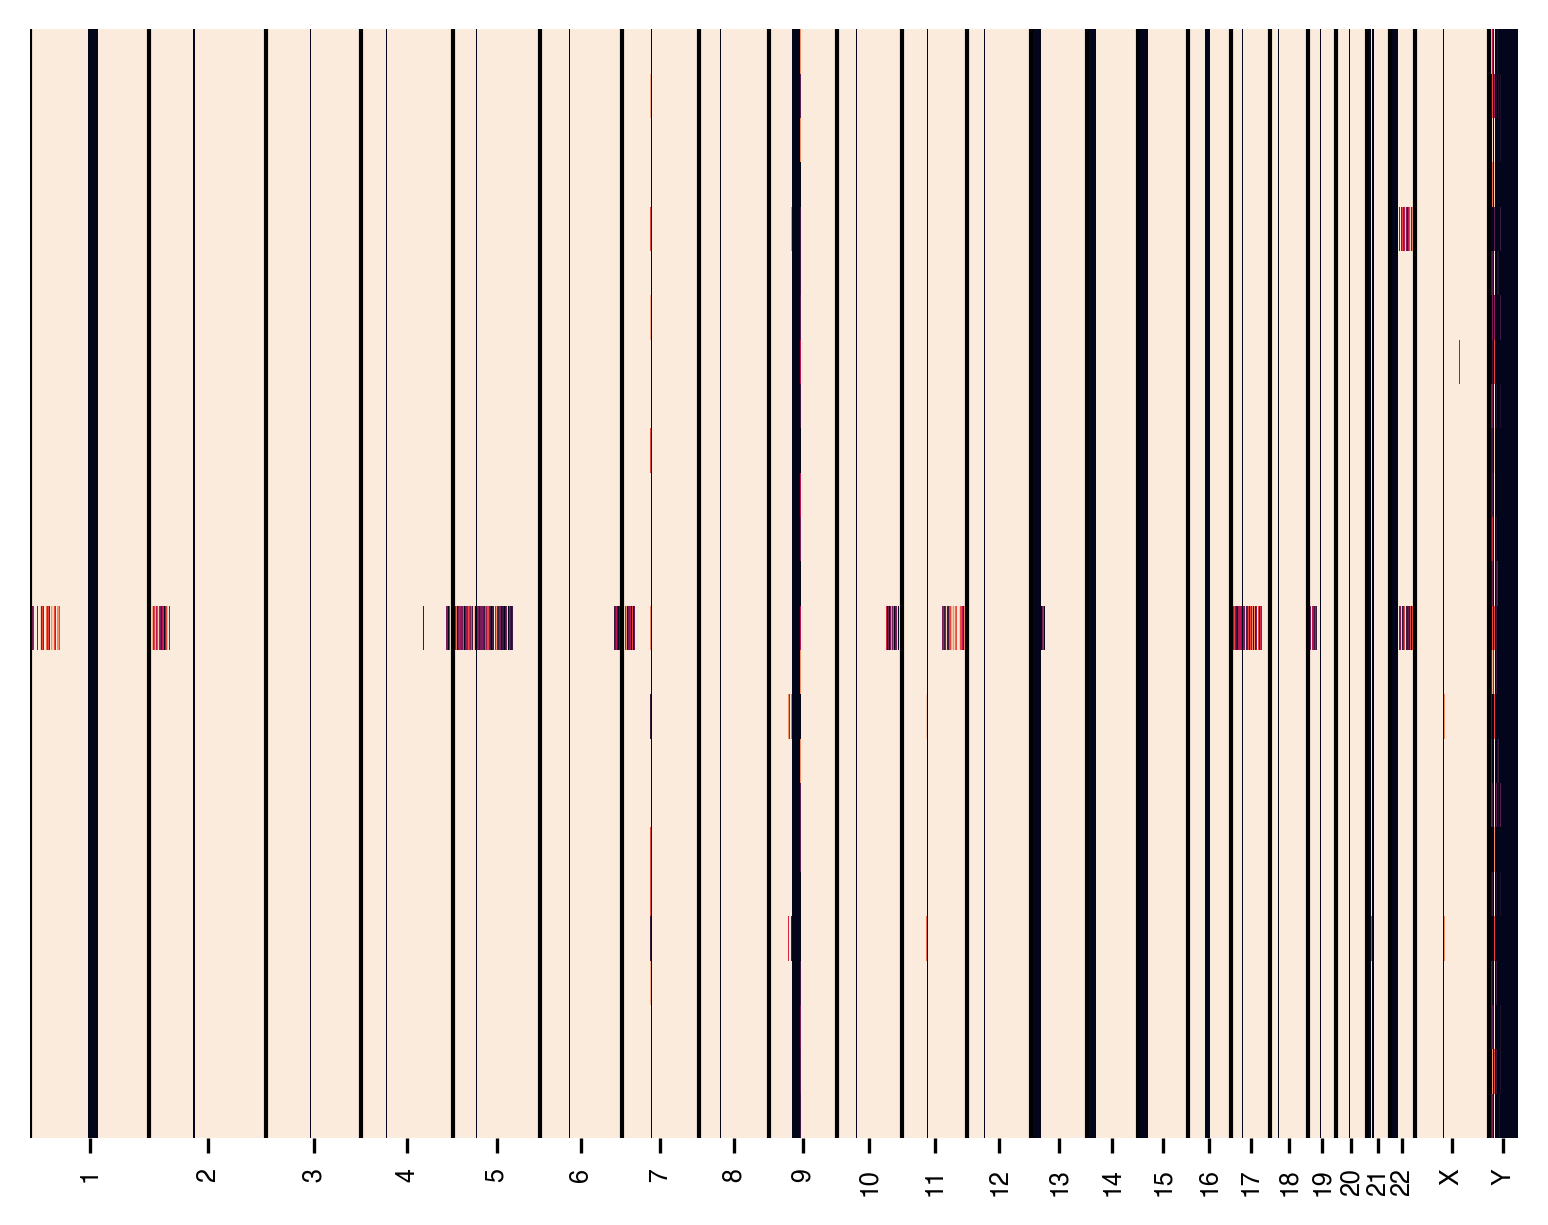

In [9]:

g = scgenome.pl.plot_cell_cn_matrix(adata, layer_name=None, raw=True)



## Specifying Cell Order

Cells can be ordered in a heatmap by specifying any set of one or more fields from `.obs`.  A legend can be added to a specific matplotlib axis, either the heatmap axis or a distinct axis to allow for flexible positioning of the legend.


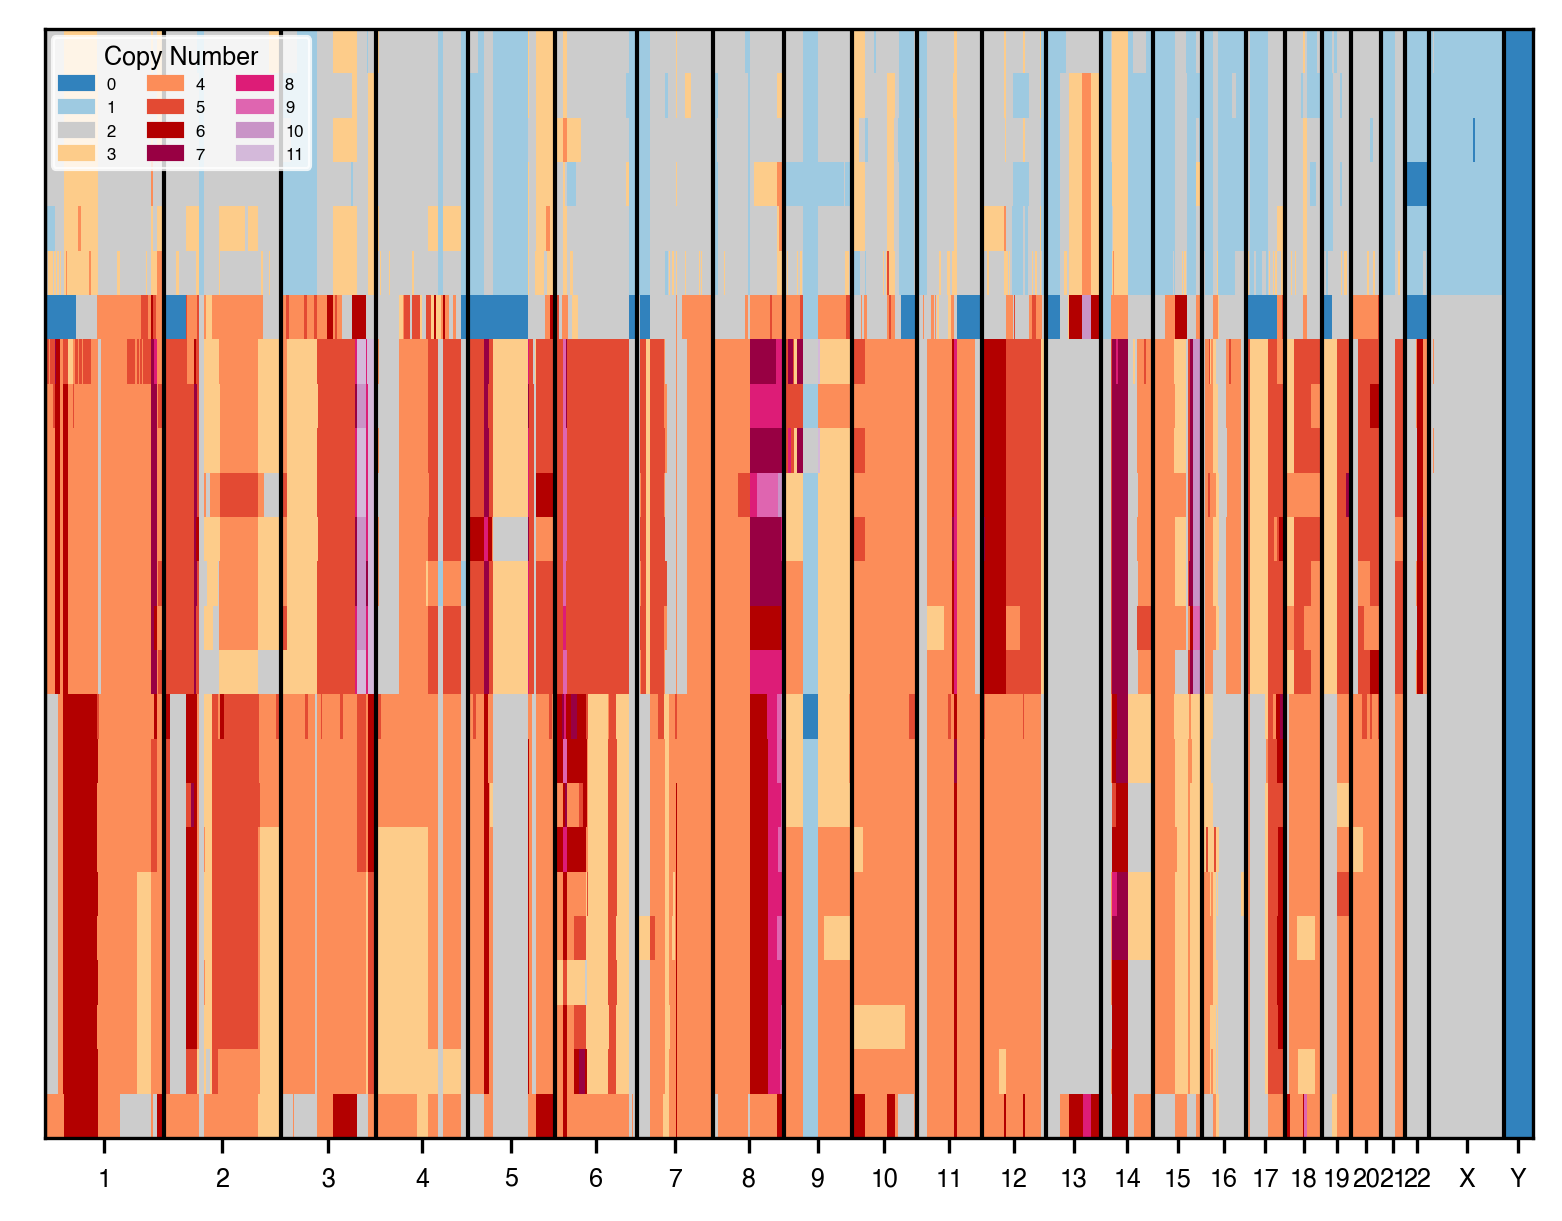

In [10]:

g = scgenome.pl.plot_cell_cn_matrix(
    adata,
    cell_order_fields=['cell_order'])
scgenome.pl.cn_legend(plt.gca())



## Annotated Heatmaps

The `scgenome.pl.plot_cell_cn_matrix_fig` function can be used to produce more complex heatmaps.  Cells can annotated with any field from `.obs`.  Categorical fields will be given a discrete color map.  Real valued fields will be given a continuous color map.


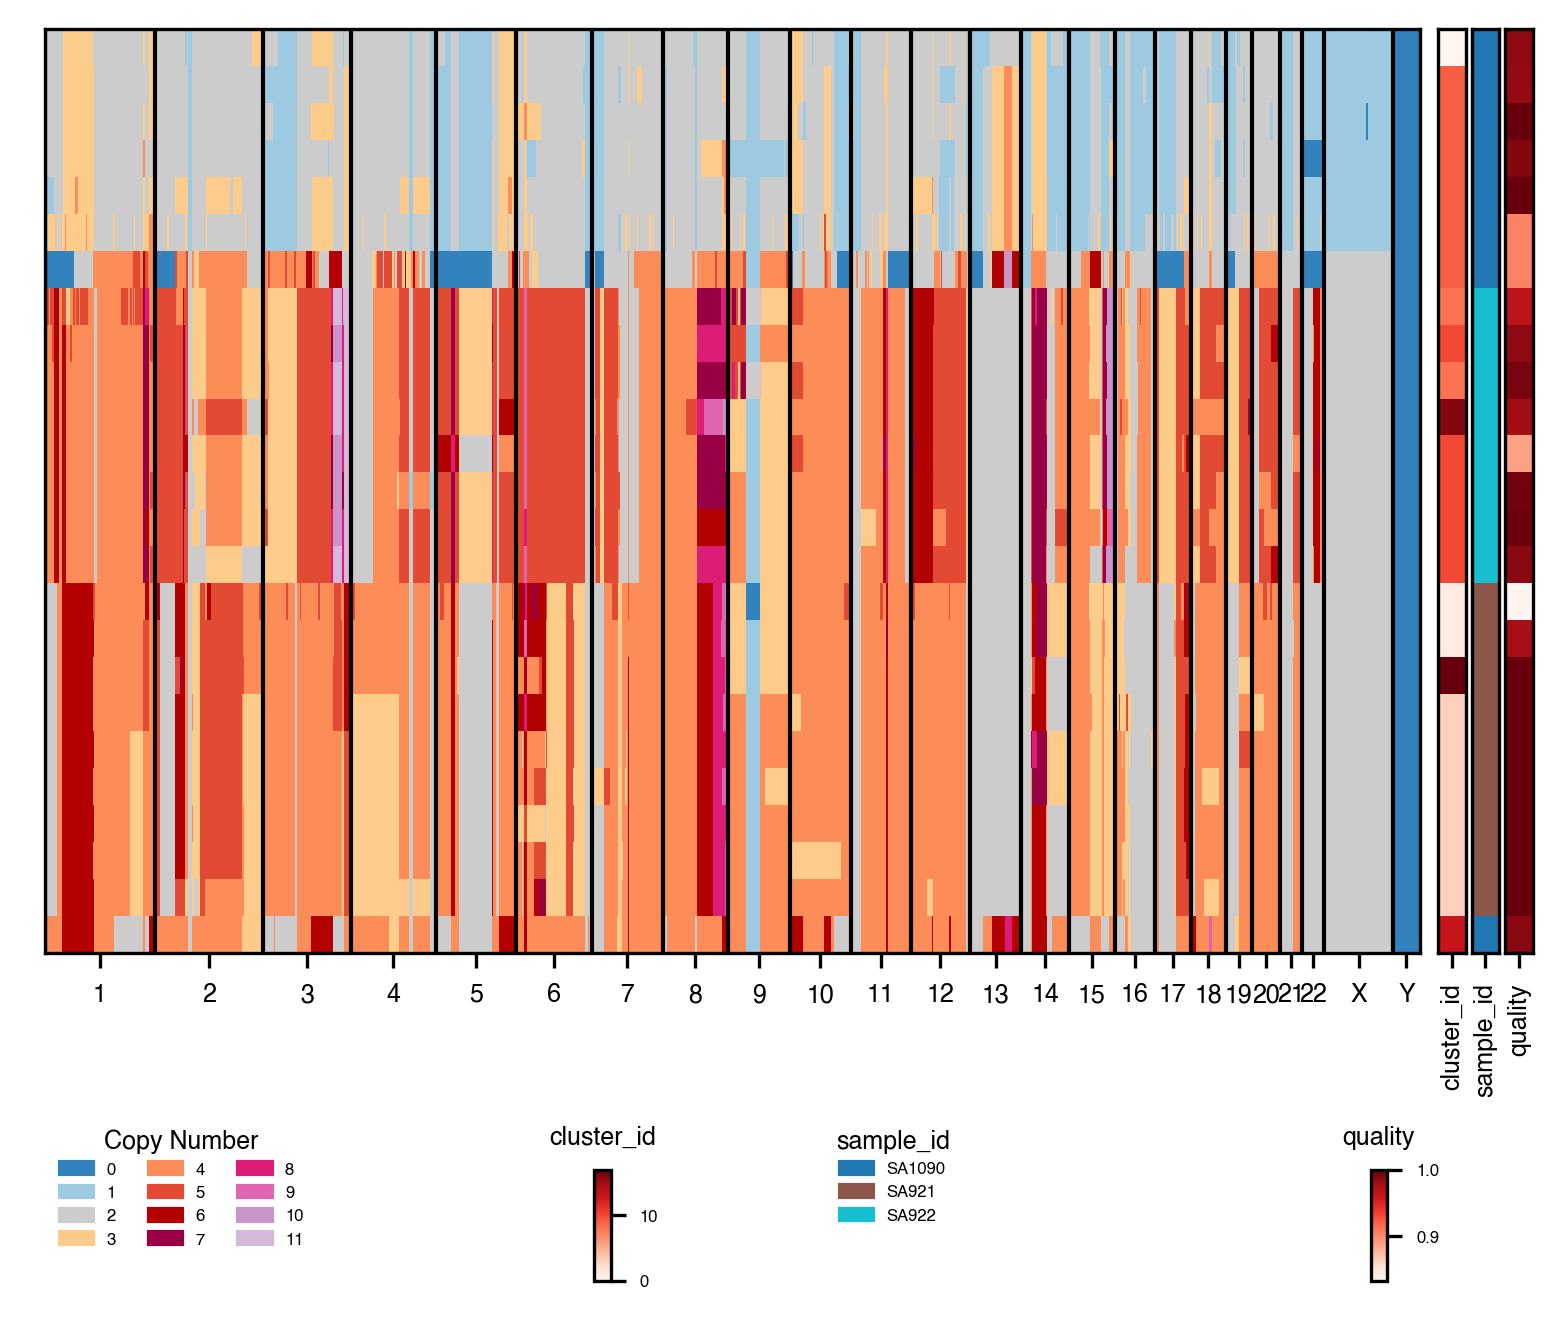

In [5]:

g = scgenome.pl.plot_cell_cn_matrix_fig(
    adata,
    cell_order_fields=['cell_order'],
    annotation_fields=['cluster_id', 'sample_id', 'quality'])



## Irregular bin widths

Irregular bin widths will result in an irregular heatmap.  The `scgenome.tl.rebin_regular` function can be used to rebin data into a consistent bin widths before generating a heatmap.  The heatmap below does not have consistent bin widths resulting in segments and chromosomes having incorrect relative sizes.


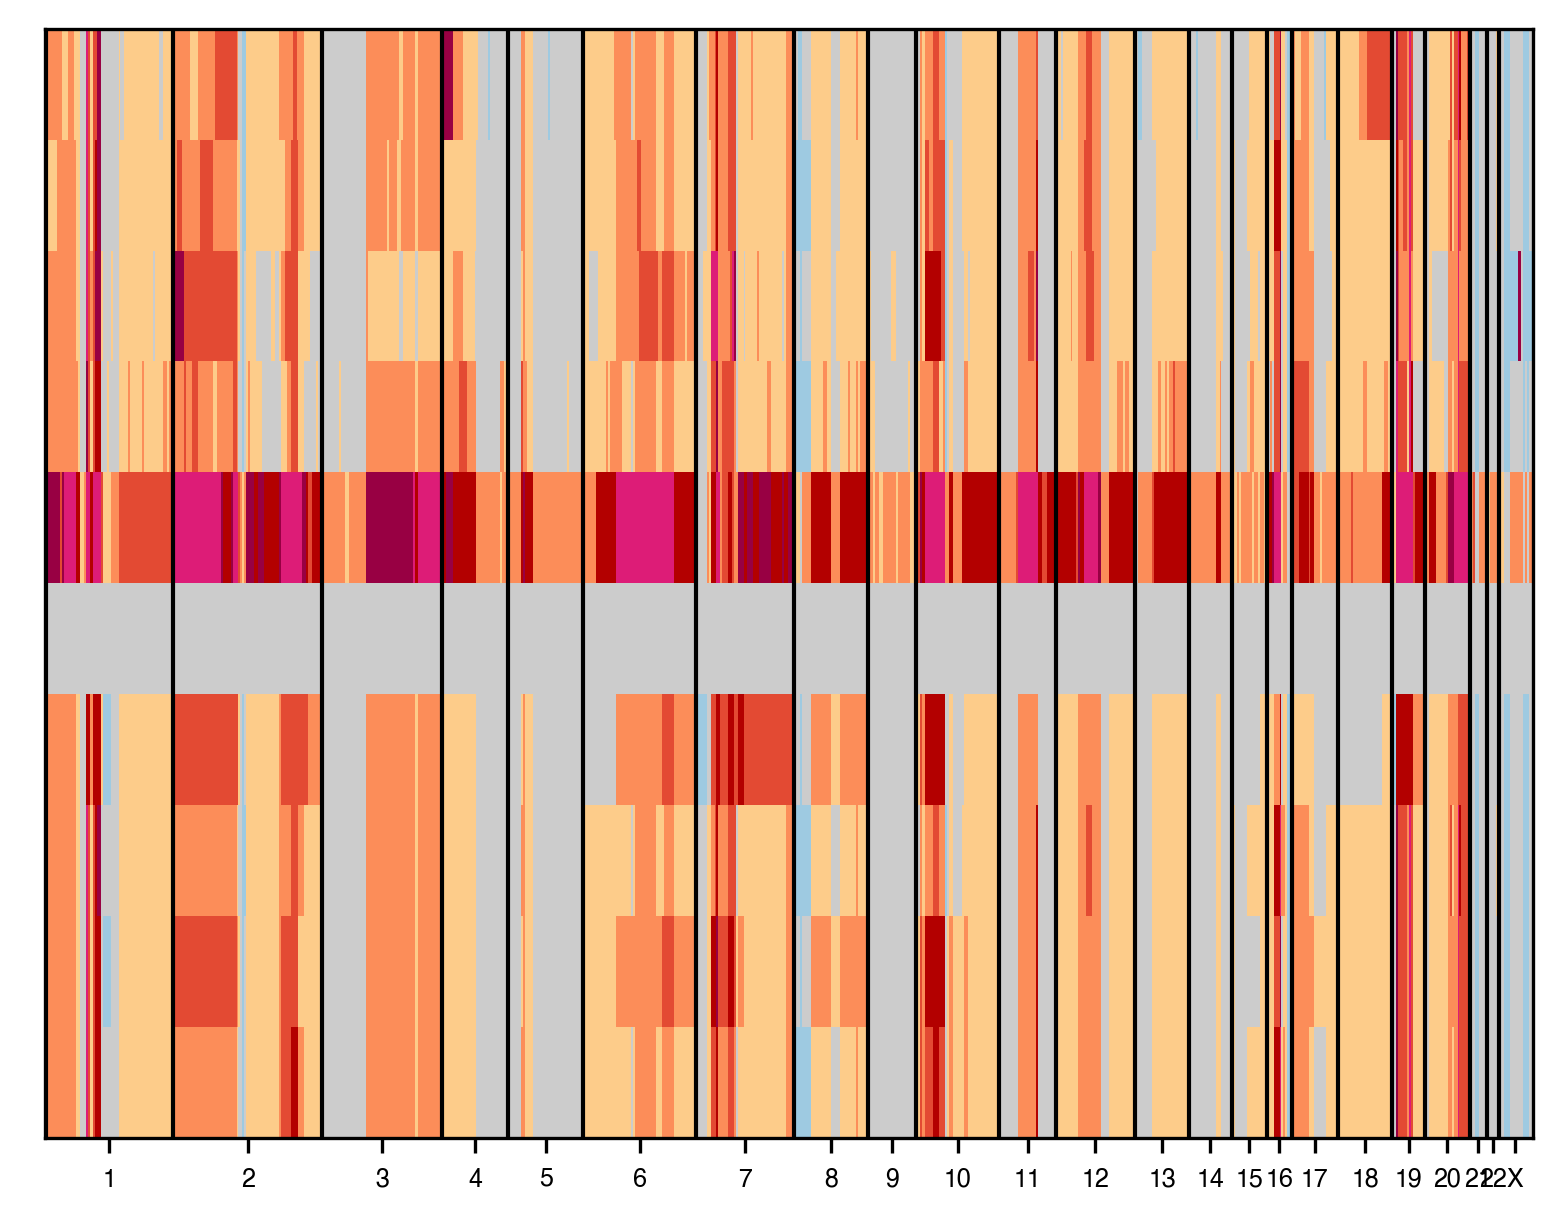

In [11]:

adata_irregular = scgenome.datasets.OV_051_Medicc2_reduced()

plt.figure()
g = scgenome.pl.plot_cell_cn_matrix(adata_irregular, layer_name=None)



An `AnnData` holding copy number data can be rescaled with `scgenome.tl.rebin_regular` as shown below.  Specify the new bin width and the functions for aggregating `X`, `layers` and `var`.  Set `outer_join=True` to ensure all bins are represented in the new `var`, with `NaN` where there were no overlapping bins in the `var` of the input `AnnData`.  Otherwise the new `var` is subset to only regions overlapping the `var` of the input `AnnData`.


/Users/mcphera1/Projects/scgenome/scgenome/tools/ranges.py:242: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(


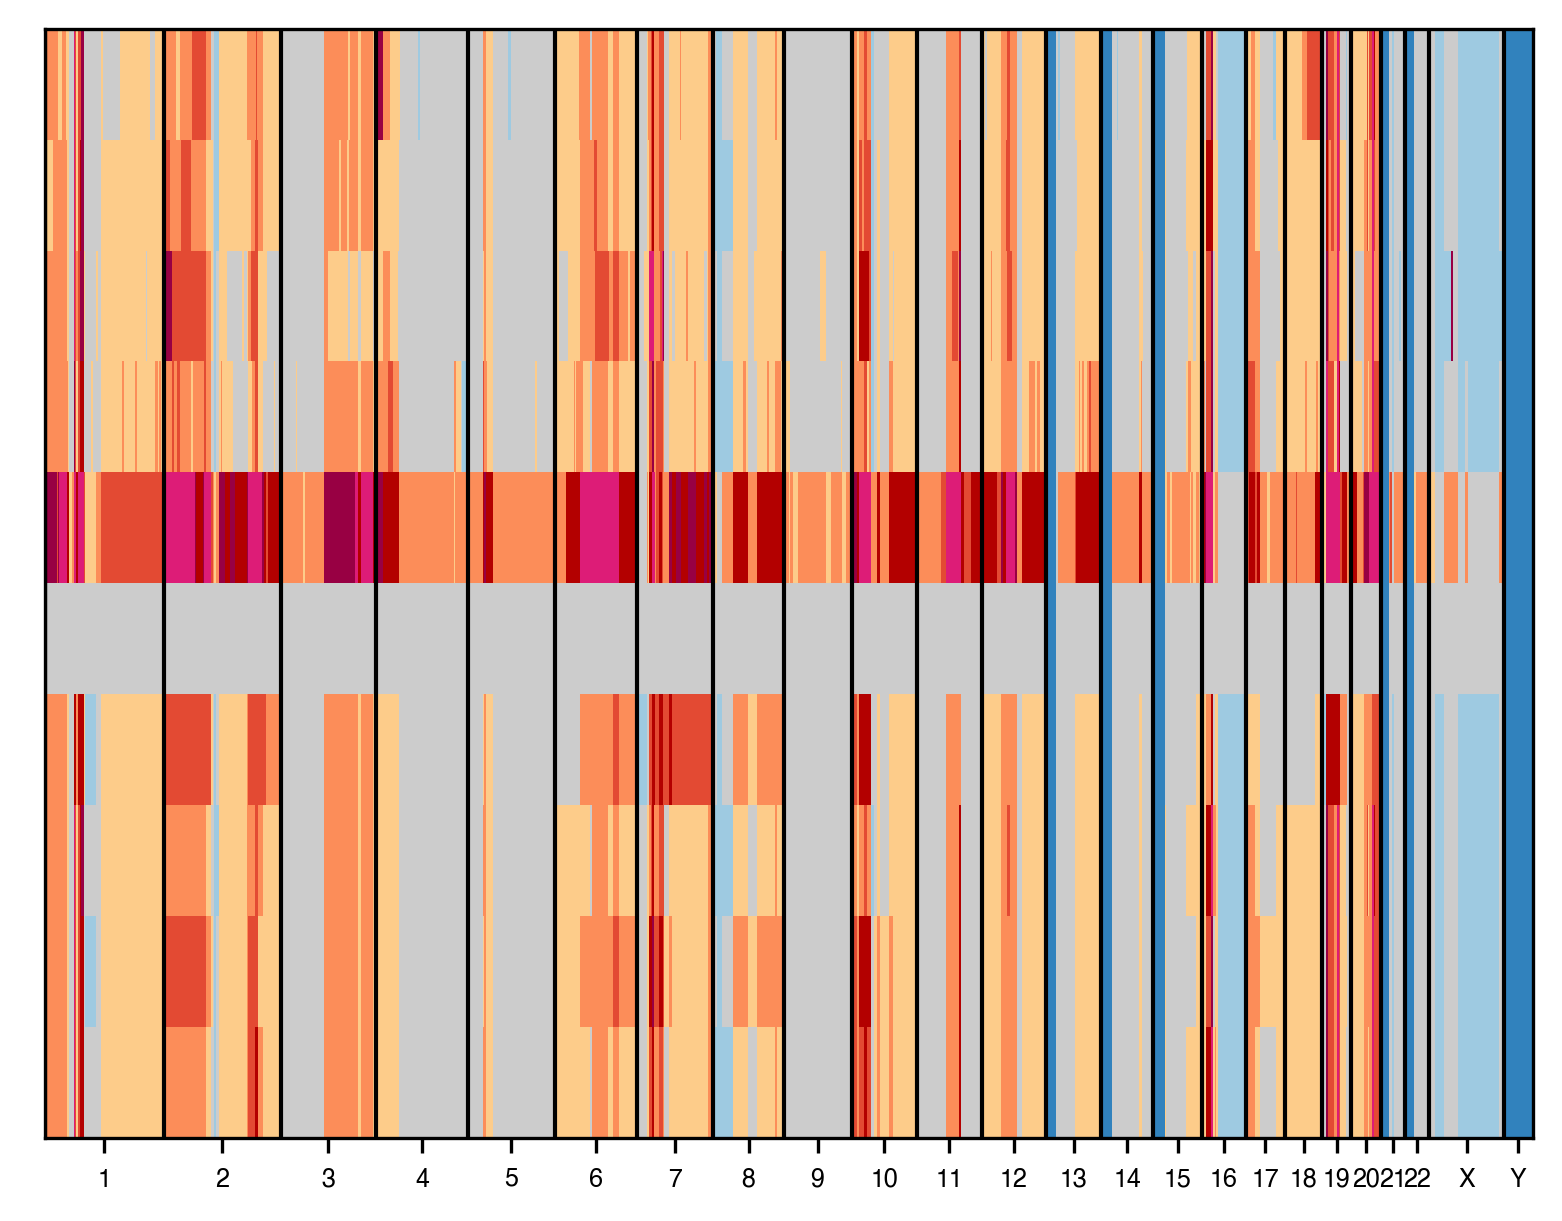

In [7]:

adata_regular = scgenome.tl.rebin_regular(
    adata_irregular, 500000, outer_join=True, agg_X=scgenome.tl.bin_width_weighted_mean, agg_layers={},
    agg_var={'is_normal': ('is_normal', scgenome.tl.bin_width_weighted_mean)})

g = scgenome.pl.plot_cell_cn_matrix(adata_regular, layer_name=None)
